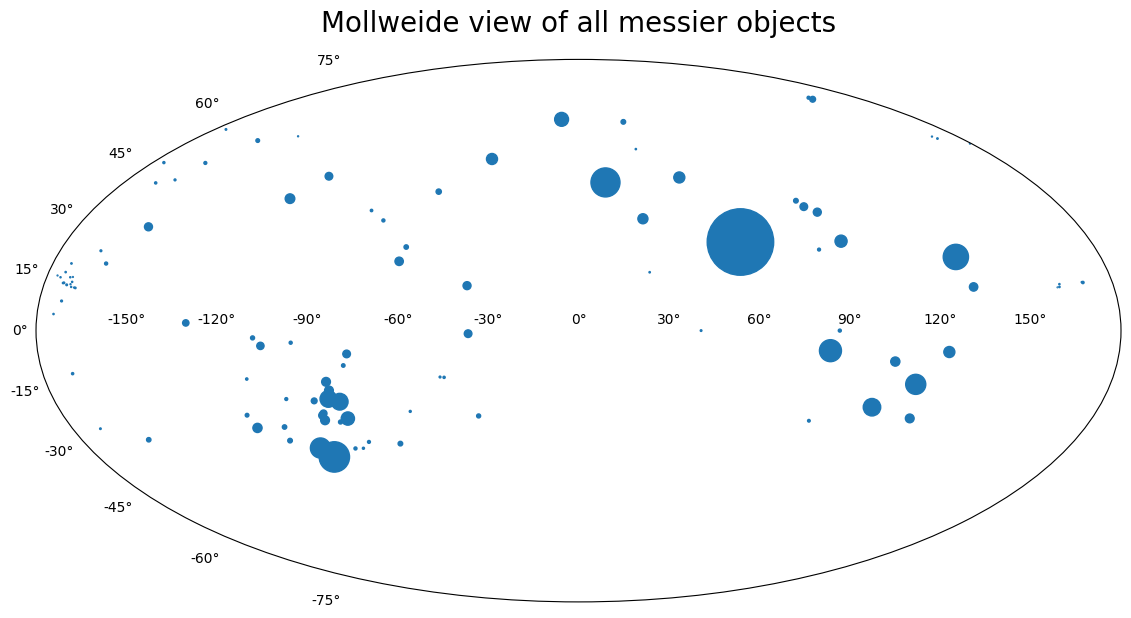

In [3]:
import numpy as np
from astropy import units as u 
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from astropy.io import ascii
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord

data = ascii.read("Messier-objects-details-Sheet1-2.csv")
stars = ascii.read("hygfull.csv")
#a function to return separation in degrees
def separation(ra1, dec1, ra2, dec2):   
    c1 = SkyCoord(ra = ra1*u.degree, dec = dec1*u.degree)
    c2 = SkyCoord(ra = ra2*u.degree, dec = dec2*u.degree)
    sep = c1.separation(c2).degree
    return sep
#a function to return separation in degrees
def separation2(ra1, dec1, ra2, dec2):   
    sep = 0
    if((ra1 - ra2 < 5 and ra1 - ra2 > -5) and (dec1 - dec2 < 5 and dec1 - dec2 > -5)):
      sep = 1
    return sep
#read Messier and Stars data

ra = coord.Angle(data['RA'])
ra.degree
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(data['DEC']*u.degree)
msize = data['Mag']
Msize = np.array(10**(msize/(-2.5)))*10000

raS = coord.Angle(stars['RA']*u.radian)
raS.degree
raS = raS.wrap_at(180*u.degree)
decS = coord.Angle(stars['Dec']*u.degree)
mag = stars['Mag']
mag = np.array(10**(-0.4*mag))*100
def plotMessier(x, y, c):
    raM = coord.Angle(x)
    raM.degree
    raM = raM.wrap_at(180*u.degree)
    decM = coord.Angle(y*u.degree)
    fig = plt.figure(figsize = (14, 12))
    ax = fig.add_subplot(111, projection = "mollweide")
    ax.text(raM.radian + 0.08, decM.radian + 0.08, 'M' + str(c+1), fontsize=12, color='blue', ha='left', va='bottom', alpha=0.8)
    ax.set_title('Position of M' + str(c+1) + ' in Mollweide view', fontsize = 20, pad = 20)
    ax.scatter(raM.radian, decM.radian, s = 200)
#plotting all messier objects in sky
fig = plt.figure(figsize = (14,12))
ax = fig.add_subplot(111, projection = "mollweide")
ax.set_title('Mollweide view of all messier objects', fontsize = 20, pad = 20)
ax.scatter(ra.radian, dec.radian, s=Msize)

Enter messier number (1 to 110):  25


Messier data: 
NGC:  IC4725 
Constellation:  SGR 
Coordinates:  18h 31.6m -19.25 
Magnitude:  4.6


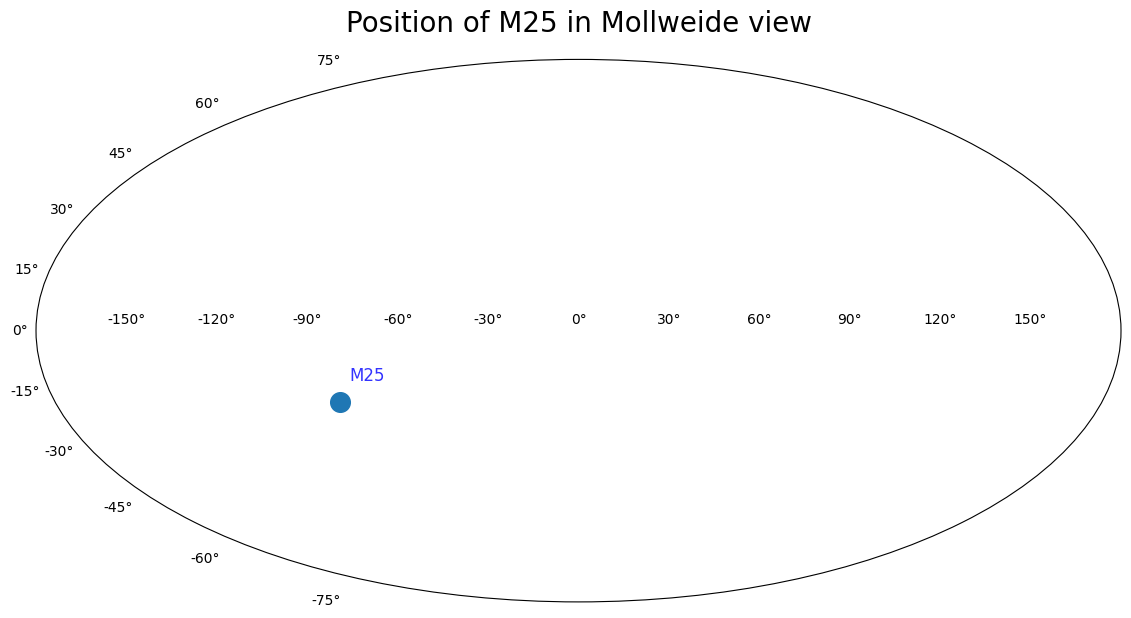

In [4]:
def messierstarmap(c):
    n = 0
    nearby = []
    dist = []
    for i in range(len(raS)):
      if(separation2(raS[i].degree, decS[i].degree, ra0, dec0) == 1):
        nearby.append([raS.degree[i], decS.degree[i], mag[i]*10])

    x = []
    y = []
    m = []
    for k in nearby:
        x.append(k[0])
        y.append(k[1])
        m.append(k[2])

    plt.style.use('seaborn-whitegrid')
    plt.scatter(x, y, s=m)
    plt.scatter(ra0, dec0, c='red')
    plt.xlabel("Right Ascension (Degrees)")
    plt.ylabel("Declination (Degrees)")
    plt.text(ra0, dec0, 'M' + str(c+1), fontsize=12, color='red', ha='left', va='bottom', alpha=1)
    plt.title('Skymap of M' + str(c+1), fontsize = 15, pad = 10)
    plt.show()
c = int(input("Enter messier number (1 to 110): "))-1
if(c >= 0 & c < 110):
    print("Messier data: \nNGC: ", data['NGC'][c], "\nConstellation: ", data['CON'][c], "\nCoordinates: ", data['RA'][c], data["DEC"][c], "\nMagnitude: ", data['Mag'][c])
    plotMessier(data['RA'][c], data['DEC'][c], c)
    ra0 = ra.degree[c]
    dec0 = dec.degree[c]
      
else:
    print("Wrong input")

In [9]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [10]:
plt.style.use('default')  # or any other available style

In [12]:
def messierstarmap(c):
    n = 0
    nearby = []
    dist = []
    for i in range(len(raS)):
        if separation2(raS[i].degree, decS[i].degree, ra0, dec0) == 1:
            nearby.append([raS.degree[i], decS.degree[i], mag[i] * 10])

    x = []
    y = []
    m = []
    for k in nearby:
        x.append(k[0])
        y.append(k[1])
        m.append(k[2])

    # Commented out the style setting line
    # plt.style.use('seaborn-whitegrid')

    plt.scatter(x, y, s=m)
    plt.scatter(ra0, dec0, c='red')
    plt.xlabel("Right Ascension (Degrees)")
    plt.ylabel("Declination (Degrees)")
    plt.text(ra0, dec0, 'M' + str(c + 1), fontsize=12, color='red', ha='left', va='bottom', alpha=1)
    plt.title('Skymap of M' + str(c + 1), fontsize=15, pad=10)
    plt.show()


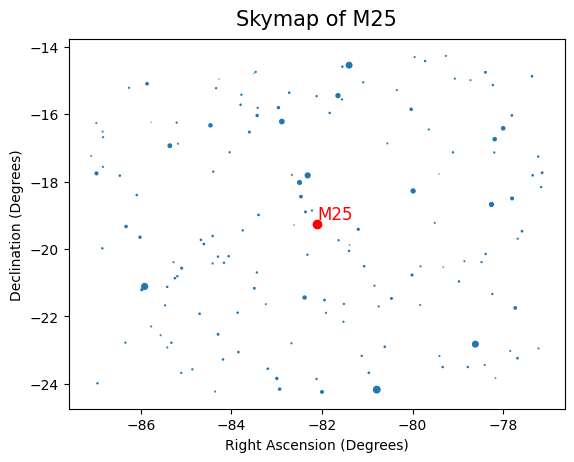

In [13]:
messierstarmap(c)